In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from I3Tray import *
from icecube.dataclasses import ModuleKey
import numpy as np
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi
import scipy.constants as spc
import SelectingDoublePeakDOM

loaded geometry
0
MINIMIZER


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/_minimize.py:394: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:56: RuntimeWarning: invalid value encountered in log
  L = model - (n*np.log(model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:64: RuntimeWarning: invalid value encountered in log
  L = model - (n*np.log(model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:64: RuntimeWarning: divide by zero encountered in log
  L = model - (n*np.log(model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:64: RuntimeWarning: invalid value encountered in multiply
  L = model - (n*np.log(model))


LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
MINIMIZER


/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:71: RuntimeWarning: divide by zero encountered in divide
  val = model - n + (n*np.log(n/model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:71: RuntimeWarning: invalid value encountered in log
  val = model - n + (n*np.log(n/model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:56: RuntimeWarning: divide by zero encountered in log
  L = model - (n*np.log(model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:56: RuntimeWarning: invalid value encountered in multiply
  L = model - (n*np.log(model))
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
MINIMIZER
LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
MINIMIZER
LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
('Center of Mass - ', 112.711434968064, -142.4412794642702, -143.751813324874)
('Distance to CoG -', array([54.98378599, 21.84876691, 33.63808124, 70.60929403]))
MINIMIZER


/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:77: RuntimeWarning: divide by zero encountered in divide
  val = model - n + (n*np.log(n/model))
/home/users/akatil/P-ONE/git/PONE_NuTau/BiGauss/likelihoodHelpers.py:77: RuntimeWarning: invalid value encountered in log
  val = model - n + (n*np.log(n/model))


LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
MINIMIZER
LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
('Center of Mass - ', -43.49889235084722, -189.90152672089673, -16.61155063191191)
('Distance to CoG -', array([ 6.98478468, 35.69537962]))
MINIMIZER
LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
('Center of Mass - ', 115.98816788283612, 5.584073653352637, -147.74632206289266)
('Distance to CoG -', array([87.60112897]))
MINIMIZER
LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
MINIMIZER


/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:1852: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:2189: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:1849: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/cvmfs/icecube.opensciencegrid.org/py2-v3.1.1/RHEL_7_x86_64/lib/python2.7/site-packages/scipy/optimize/optimize.py:2439: Ru

LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
MINIMIZER
LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
MINIMIZER
LOG_LIKELIHOOD_RATIO
TIME DIFFERENCE
('Center of Mass - ', -44.508967531400955, -194.88399725612402, 227.79158194867873)
('Distance to CoG -', array([40.27983443,  0.29762036, 39.72042414, 79.72035882]))


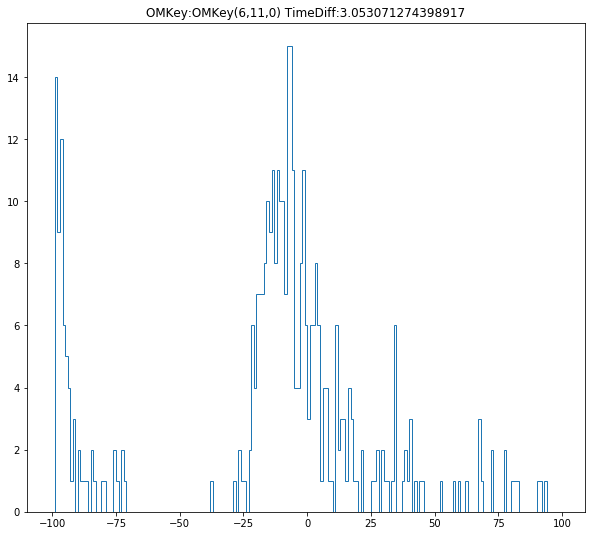

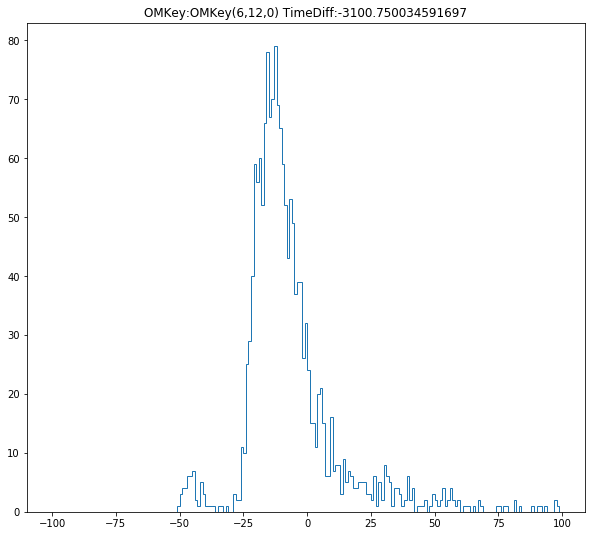

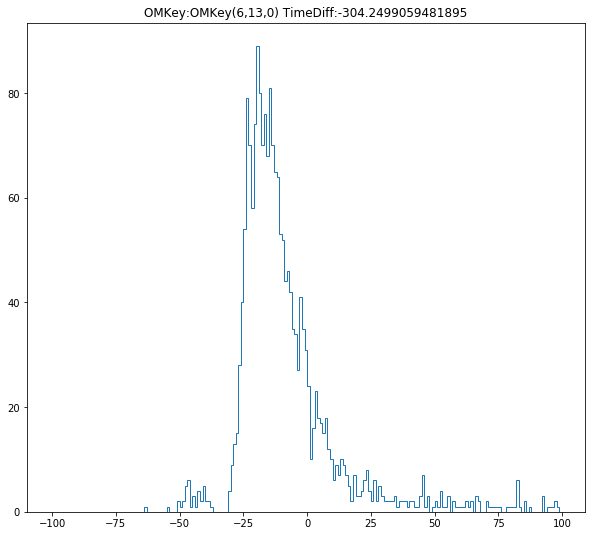

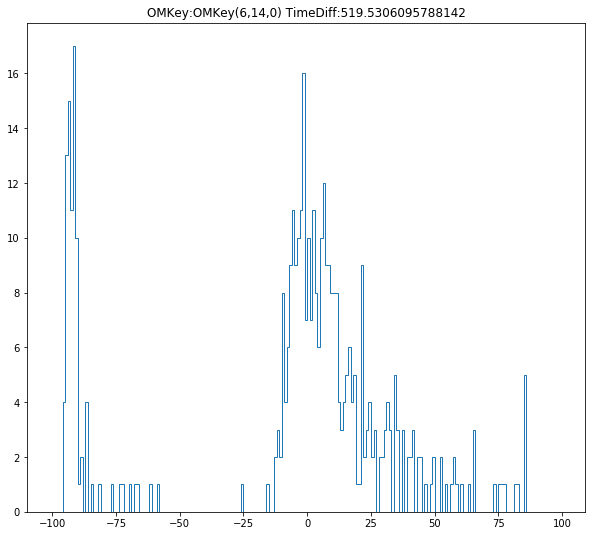

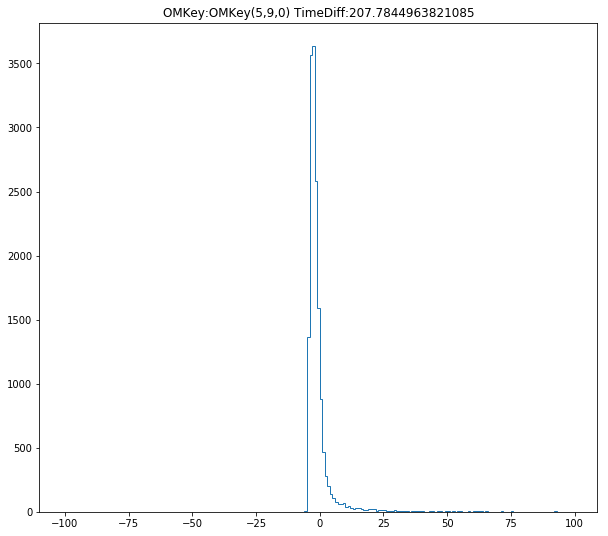

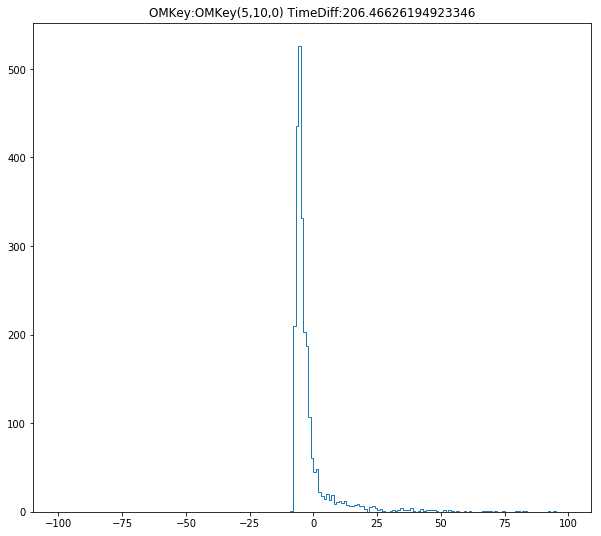

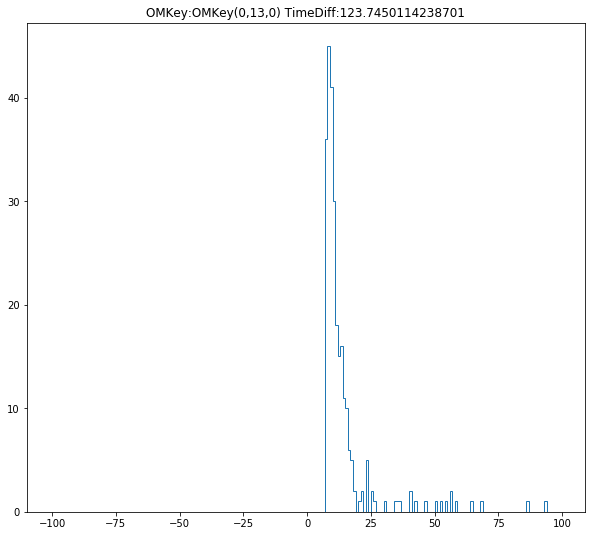

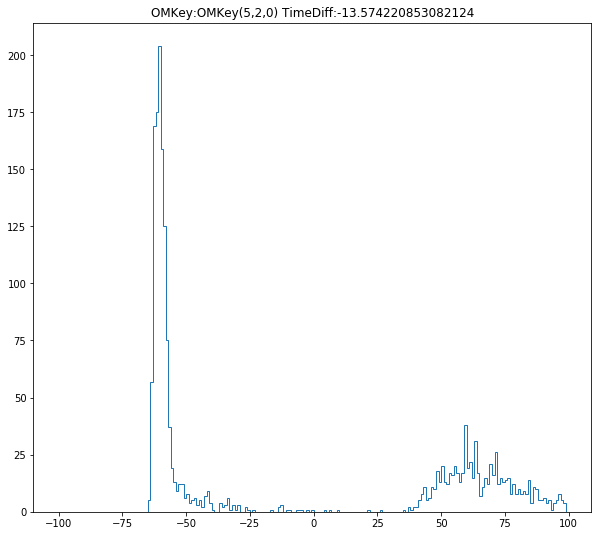

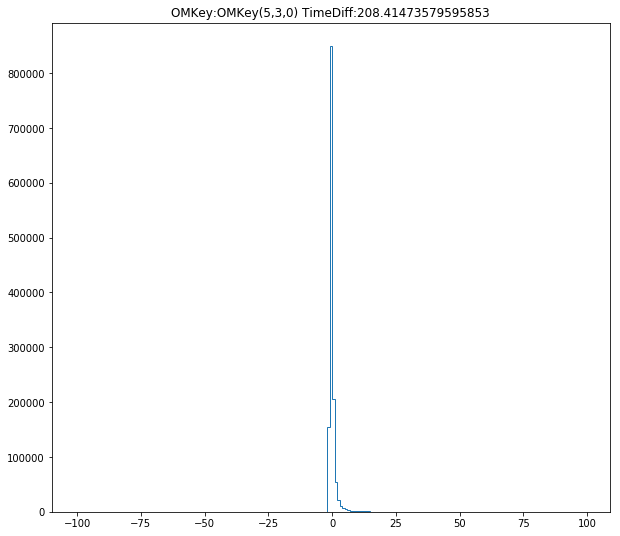

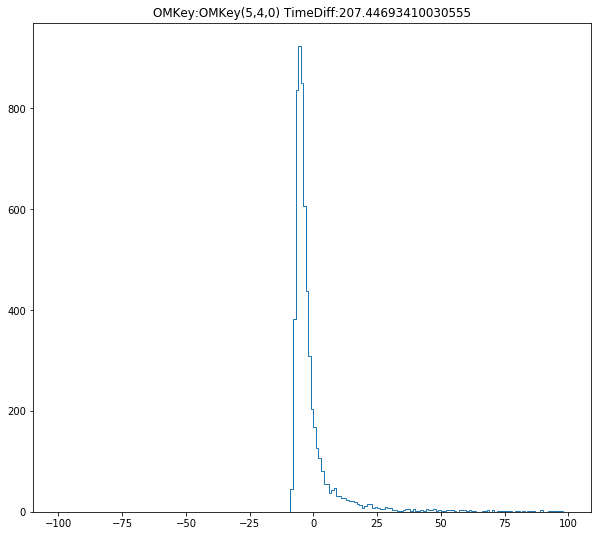

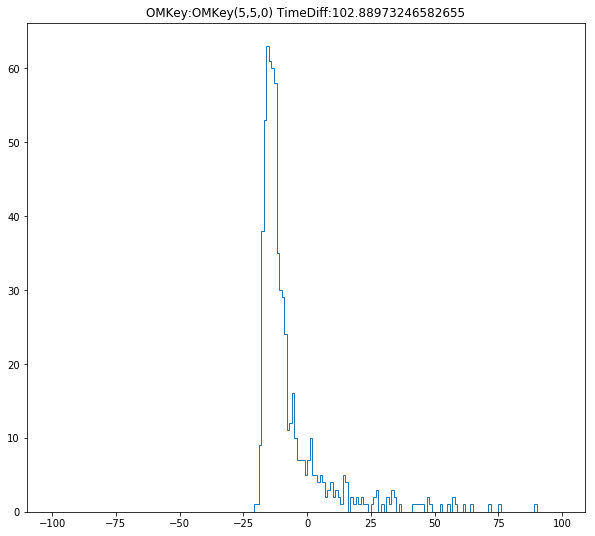

In [3]:
'''

Loading the geometry

'''

gcd_file = '/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz'
gcd = dataio.I3File(gcd_file)
cframe = gcd.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

infile = '/data/p-one/akatil/step_4_medium_water/step_4_506_medium_water_custom_mDOM_noise.i3.gz'
outDir = '/data/p-one/akatil/double_peak_studies/'
outfile = '/data/p-one/akatil/test/step_4_506_medium_water_doublePeak.i3.gz'

def getListOfFiles(dirName):
     
    # create a list of file and sub directories 
    # names in the given directory 
 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                 
    return allFiles

dirName = "/data/p-one/akatil/step_4_medium_water/"
  
listOfFiles = getListOfFiles(dirName)

# sort filenames by creation date (ascending)
sorted_files = sorted(listOfFiles, key=os.path.getmtime)

selectFiles  =  sorted_files[81:82]

file_num = 0
for file in selectFiles:
    print file_num
    tray = I3Tray()

    tray.AddModule('I3Reader', 'reader',
                FilenameList = [gcd_file, file]
                )

    tray.AddModule(SelectingDoublePeakDOM.definingDOMs, "Double Peak Selector",
                   omgeo = omgeo,
                   InputMCPETree = "MCPESeriesMap",
                   NoiseMCPETree = "NoiseSeriesMap",
                   OutputMCPETree = "DoublePeakSeriesMap")

    
    tray.AddModule("TrashCan","adios")
    tray.Execute()
    tray.Finish()
    
    file_num += 1

In [1]:
tray.AddModule("I3Writer","writer",
                   #SkipKeys=SkipKeys,
                   Filename = outDir+'double_peak_'+str(file_num)+'.i3.gz',
                   Streams = [icetray.I3Frame.DAQ, icetray.I3Frame.Physics],
                  )

NameError: name 'tray' is not defined

In [ ]:
mean = tot_timeList.mean()
                    timestamps = tot_timeList - mean
                    final_mean = timestamps.mean()

                    bins = np.arange(final_mean - 100, final_mean + 100, 1)
                    num, bin_edges = np.histogram(timestamps, bins=bins)
                    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

                    print('MINIMIZER')
                    nll = lambda *args: log_likelihood_biGauss(*args)
                    initial_biGauss = np.array([final_mean, 50, 5, max(num)])
                    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 100), (0, 10), (0, 1e6))
                    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                            args=(num, bin_centers),
                                            method='Powell',
                                            bounds = bnds_biGauss)

                    #Double Peak

                    nll = lambda *args: log_likelihood_doublePeak(*args)
                    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(num), final_mean, 20, 1, max(num)])
                    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 100), (0, 10), (0, 1e6),
                                        (final_mean, max(bin_centers)), (0, 100), (0, 10), (0,1e6))
                    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                                args=(num, bin_centers),
                                                method='Powell',
                                                bounds=bnds_doublePeak)

                    print('LOG_LIKELIHOOD_RATIO')

                    LR_biGauss = likelihood_ratio_biGauss(bin_centers[num>0], num[num>0], soln_biGauss.x[0],
                                                          soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                    LR_doublePeak = likelihood_ratio_doublePeak(bin_centers[num>0], num[num>0], soln_doublePeak.x[0],
                                                                soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                                soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                                soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                                soln_doublePeak.x[7])

                    print('TIME DIFFERENCE')
                    timeDifference_doublePeak = soln_doublePeak.x[4] - soln_doublePeak.x[0]